In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

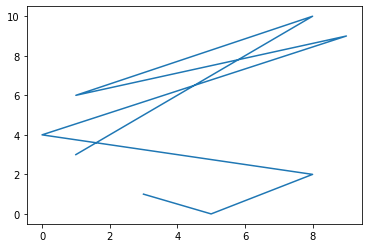

In [2]:
x = np.array([1,8,1,9,0,8,5,3])
y = np.array([3,10,6,9,4,2,0,1])
plt.plot(x,y)
plt.show()